In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product 
from pandas import DataFrame

# Import BeamSection module from FlightBEND
from FlightBEND.beam_section import BeamSection

# Turn off interactive ploting
plt.ioff()

In [25]:
# Trailing edge [True or False]
withTE            = True
# Number of stringers [0,2,4,6,8]
numberOfStringers = 8


In [26]:
## Import mesh
if withTE:
    match numberOfStringers:
        case 8:        
            from meshes.NACA0015_WithTE_8str_1858e  import dados as data; 
            pointAelem = 488
            pointBelem = 1680
        case 6:
            from meshes.NACA0015_WithTE_6str_1826e  import dados as data; 
            pointAelem = 456
            pointBelem = 1648
        case 4:
            from meshes.NACA0015_WithTE_4str_1794e  import dados as data; 
            pointAelem = 424
            pointBelem = 1616
        case 2:
            from meshes.NACA0015_WithTE_2str_1762e  import dados as data; 
            pointAelem = 392
            pointBelem = 1582
        case 0:
            from meshes.NACA0015_WithTE_0str_1730e  import dados as data; 
            pointAelem = 360
            pointBelem = 1540
        case _:
            raise Exception('Invalid number of stringers. Please select 0 to 4 stringer pairs')
else:
    match numberOfStringers:
        case 8:        
            from meshes.NACA0015_NoTE_8str_1300e  import dados as data; 
            pointAelem = 488
            pointBelem = 1122
        case 6:
            from meshes.NACA0015_NoTE_6str_1268e  import dados as data; 
            pointAelem = 456
            pointBelem = 1090
        case 4:
            from meshes.NACA0015_NoTE_4str_1236e  import dados as data; 
            pointAelem = 424
            pointBelem = 1058
        case 2:
            from meshes.NACA0015_NoTE_2str_1204e  import dados as data; 
            pointAelem = 392
            pointBelem = 1024
        case 0:
            from meshes.NACA0015_NoTE_0str_1172e  import dados as data; 
            pointAelem = 360
            pointBelem = 992
        case _:
            raise Exception('Invalid number of stringers. Please select 0 to 4 stringer pairs')


In [27]:
# Check for orphan nodes
all_nodes = range(len(data['coordinates'])) # lista de 0 a nNos
unique_nodes = np.unique(data['elements'])

diff = np.setdiff1d(all_nodes, unique_nodes)
print('Unused nodes:')
print(diff)

Unused nodes:
[]


In [28]:
## Unpacking mesh data
# This mesh was drawn in meters, converting to mm
secNodes    = data['coordinates'] *1e3
secElems    = data['elements']

# Material properties
secYoung    = data['materials'][:,0]
secNu       = data['materials'][:,1]
secRho      = data['materials'][:,2]

# Instancing
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)


Area properties integration time:    2.233 seconds
Global stiffness assembly time:      5.154 seconds
System solve time:                   0.021 seconds
Shear center integration time:       2.928 seconds
Torsional constant integration time: 2.641 seconds


(0.0, 976.0, -74.92999999999999, 74.92999999999999)

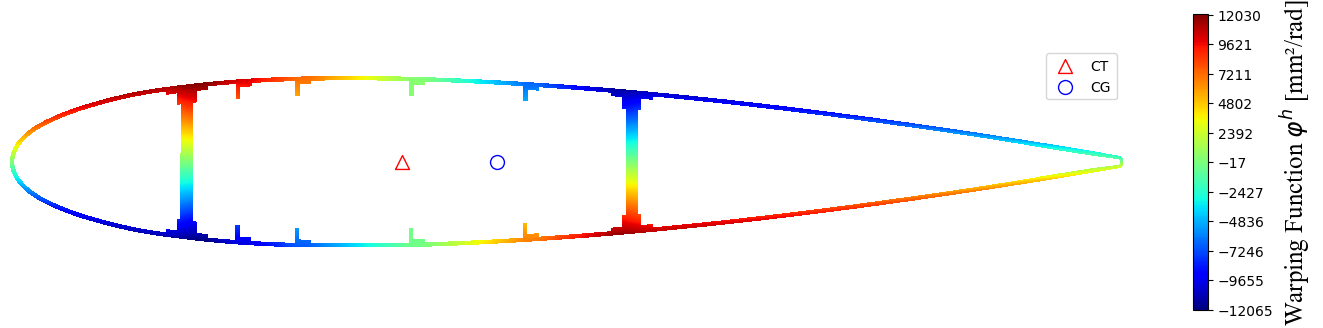

In [29]:
# Maximum and minumum displacement values from ABAQUS
vmax =  1.545e-1
vmin = -6.092e-2

## Warping
fig, ax = sec.plotWarping(levels=255, showMesh=False, lengthUnits='mm', 
                        figsize=(15,4),
                        cbarKwargs=dict(shrink=.8))

# Remove axis frame and reposition legend 
ax.get_legend().set_bbox_to_anchor([1,1])
ax.axis('off')

(-48.57399166269265, 1024.7315150949464, -82.24007598062246, 82.24145703058414)

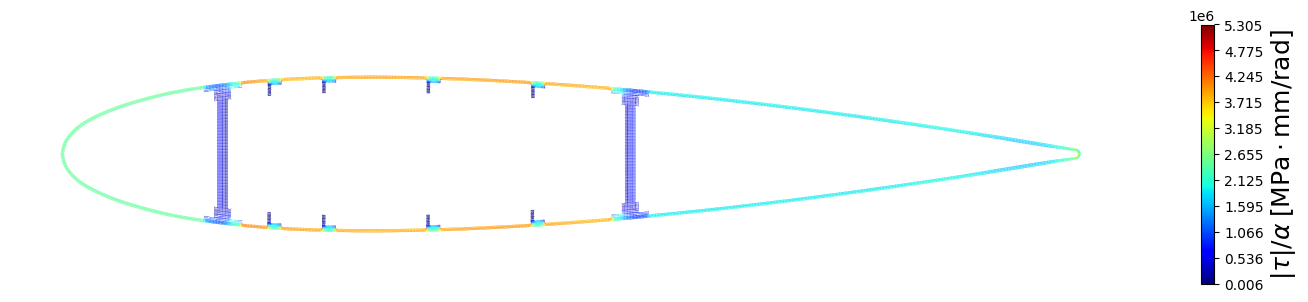

In [30]:
## Shear stresses (Vector field)
fig2, ax2 = sec.plotShearStresses(degree=4, showMesh=False,
                                  stressUnits='MPa', lengthUnits='mm',
                                  width=.2,scale=.5, headlength=5, 
                                  figsize=(15,4), cbarKwargs=dict(shrink=.7))
fig2.tight_layout()
# Remove axis frame 
ax2.axis('off')

{(0.2126222808363991,
  975.9449011514173,
  -74.76364266193126,
  74.76502371189294)}

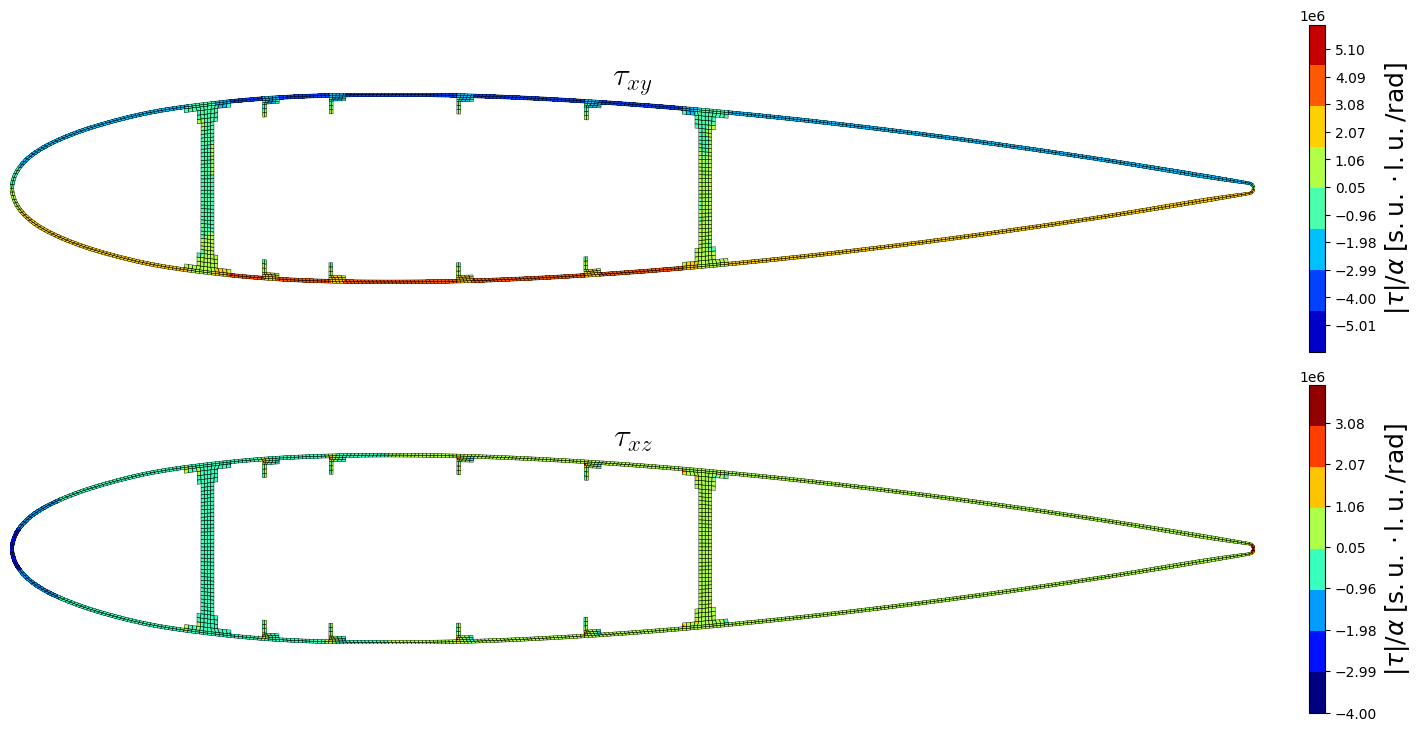

In [31]:
## Shear stresses, component wise
fig3, ax3 = sec.plotShearStresses(degree=4, mode='scalar',
                                  figsize=(15,4),
                                  cbarKwargs=dict(shrink=.8))
fig3.tight_layout()
# Remove axis frame 
{ax.axis('off') for ax in ax3}

### Details

(-48.800000000000004, 1024.8, -82.42299999999999, 82.42299999999999)

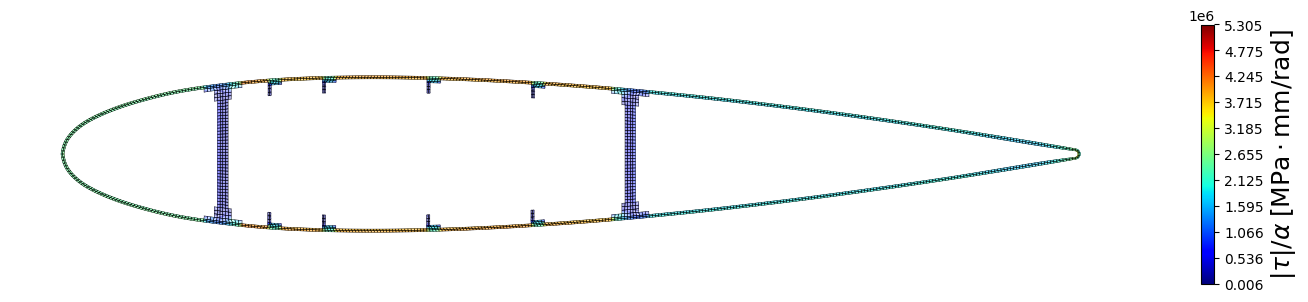

In [32]:
## Shear stresses (Vector field)
fig4, ax4 = sec.plotShearStresses(degree=4, showMesh=True,
                                  stressUnits='MPa', lengthUnits='mm',
                                  width=.2,scale=.5, headlength=5, 
                                  figsize=(15,4), cbarKwargs=dict(shrink=.7))
fig4.tight_layout()
# Remove axis frame 
ax4.axis('off')

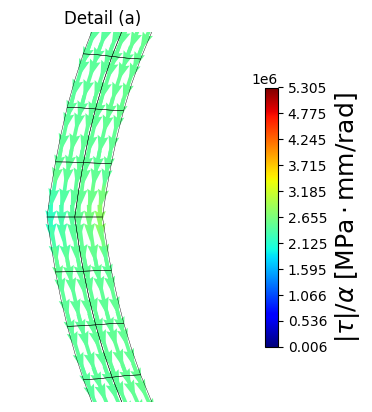

In [33]:
ax4.set_title('Detail (a)')
ax4.set_xlim([-2,8])
ax4.set_ylim([-10,10])
fig4

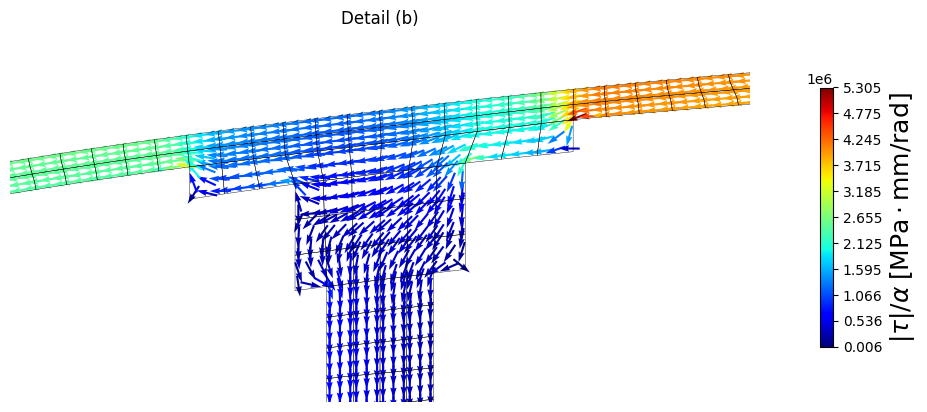

In [34]:
ax4.set_title('Detail (b)')
ax4.set_xlim([120,190])
ax4.set_ylim([40,75])
fig4

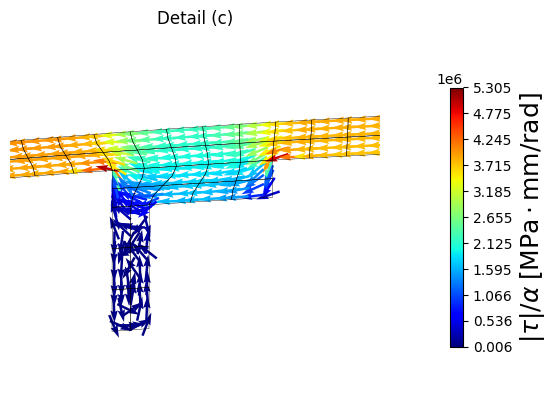

In [37]:
ax4.set_title('Detail (c)')
ax4.set_xlim([190,220])
ax4.set_ylim([50,80])
fig4

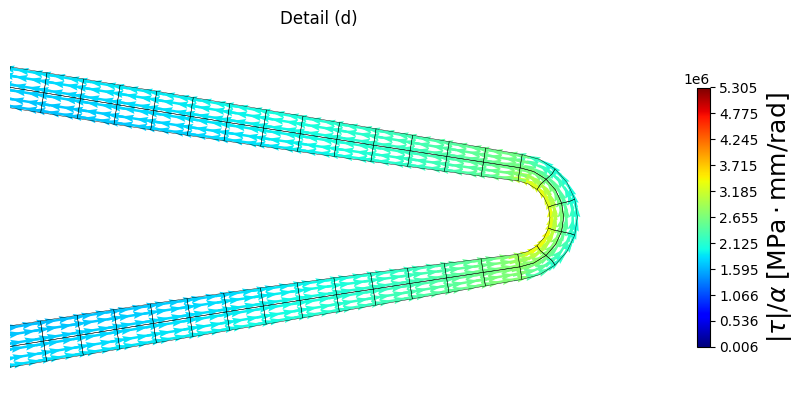

In [36]:
ax4.set_title('Detail (d)')
ax4.set_xlim([930,980])
ax4.set_ylim([-15,15])
fig4